## <img src="./logo_UTN.svg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# Trabajo Práctico 2
#### Juan Diego Scarini - UTN-FRBA - Legajo:149.624-4

***
## Ventanas


<div class="alert alert-block alert-info">
<b>1)</b> Implemente las funciones para generar las siguientes ventanas $w(k)$:

</div>

+ Bartlett ó triangular
+ Hann
+ Blackman
+ Flat-top



<div class="alert alert-block alert-success">
<b>Ayuda:</b> Puede consultar el capítulo 6.3 del libro de B. Porat para obtener las expresiones analíticas de cada ventana.

</div>

   a) Para cada ventana grafique $w(k)$ y el módulo de su espectro $ \lvert W(\Omega) \rvert $


<div class="alert alert-block alert-warning">
<img src="./ojo.svg" align="left" width="50" />  Normalice la amplitud máxima de todas las ventanas a 0 dB.
</div>

In [12]:
## Inicialización del Notebook del TP2

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas import DataFrame
from IPython.display import HTML
import scipy.signal as sig
import scipy as sci
import scipy.signal.windows as win

def generador_senoidal (fs, f0, N, a0=1, p0=0):
    """ 
    
    brief:  Generador de señales senoidal, con argumentos
    
    fs:     frecuencia de muestreo de la señal [Hz]
    N:      cantidad de muestras de la señal a generar
    f0:     frecuencia de la senoidal [Hz]
    a0:     amplitud pico de la señal [V]
    p0:     fase de la señal sinusoidal [rad]
    
    como resultado la señal devuelve:
    
    signal: senoidal evaluada en cada instante 
    tt:     base de tiempo de la señal
    """    

    # comienzo de la función  
    Ts = 1/fs
    tt=np.arange(0.0,N*Ts,Ts)        
    signal = a0 * np.sin( 2*np.pi*f0*tt + p0 )  
    # fin de la función  
    return tt, signal

def mi_analizador (signal, muestras, plotSi = False, dbSi = False):
    """
    Funcion para analizar el espectro de una señal

    Parameters
    ----------
    signal : Array of float64
        Señal que quiero analizar
    muestras : int
        Cantidad de muestras que tiene la señal
    plotSi: bool
        Define si plotea la funcion de analizador  o no
    dbSi: bool
        Define si la informacion se entrega en veces o en dB

    Returns
    -------
    fft_abs : Array of float64
        vector modulo de la fft normalizado para cumplir parseval
    fft_phs : Array of float64
        Vector de fase de la fft
    eje : Array 
        Eje de frecuencias.

    """
    tam = signal.size
    fft = sci.fft.fft(signal)
    fft_abs = np.abs(fft)*2/muestras #Se utilzia 2/N para respetar parseval y que se mantenga la PSD.
    fft_abs = fft_abs[0:tam//2]
    fft_phs = np.angle(fft,deg = True)
    fft_phs = fft_phs[0:tam//2]
    
    eje=np.arange(0,muestras/2,(muestras)/tam)
    
    if dbSi:
        np.seterr(divide = 'ignore')
        fft_abs = 20*np.log10(fft_abs[0:tam//2])
        np.seterr(divide = 'warn') 

    if plotSi:
        plt.plot(eje, fft_abs)
        plt.title("abs(scipy.fft.fft)")
        plt.grid(which='both', axis='both')
        plt.show()
        
    return fft_abs,fft_phs,eje

N  = 1000 # muestras
Nz = 19*N # Muestras para Zero padding
fs = 100000 # Hz
a0 = 1 # Volts
p0 = 0 # radianes
f0 = 1  # Hz

#Se divide por el primer coeficiente de la fft para nivelar todas las fft's a 0dB en el origen. 
#Se deja para poder analizar la diferencia en magnitud en el grafico de las ventanas

winFlatTop  =   win.flattop(N)
fftFlatTop  =   sci.fft.fft(winFlatTop)
winFlatTop  =   win.flattop(N)/(2*np.abs(fftFlatTop[0])/N)
winBartlett =   win.bartlett(N)
fftBartlett =   sci.fft.fft(winBartlett)
winBartlett =   win.bartlett(N)/(2*np.abs(fftBartlett[0])/N)
winHann     =   win.hann(N)
fftHann     =   sci.fft.fft(winHann)
winHann     =   win.hann(N)/(2*np.abs(fftHann[0])/N)
winBlackman =   win.blackman(N)
fftBlackman =   sci.fft.fft(winBlackman)
winBlackman =   win.blackman(N)/(2*np.abs(fftBlackman[0])/N)
winRect     =   np.ones(N)
fftRect     =   sci.fft.fft(winRect)
winRect     =   np.ones(N)/(2*np.abs(fftRect[0])/N)

tt=np.arange(0,N)

#Se aplica Zero-Padding para mejorar la resolucion de la fft
zeros = np.zeros(Nz)
winBartlettZero =   np.concatenate((winBartlett,zeros))
winHannZero =       np.concatenate((winHann,    zeros))
winBlackmanZero =   np.concatenate((winBlackman,zeros))
winFlatTopZero =    np.concatenate((winFlatTop, zeros))
winRectZero =       np.concatenate((winRect,    zeros))

fftBartlett =   mi_analizador(winBartlettZero,  N,False,True)
fftHann =       mi_analizador(winHannZero,      N,False,True)
fftBlackman =   mi_analizador(winBlackmanZero,  N,False,True)
fftFlatTop =    mi_analizador(winFlatTopZero,   N,False,True)
fftRect =       mi_analizador(winRectZero,      N,False,True)


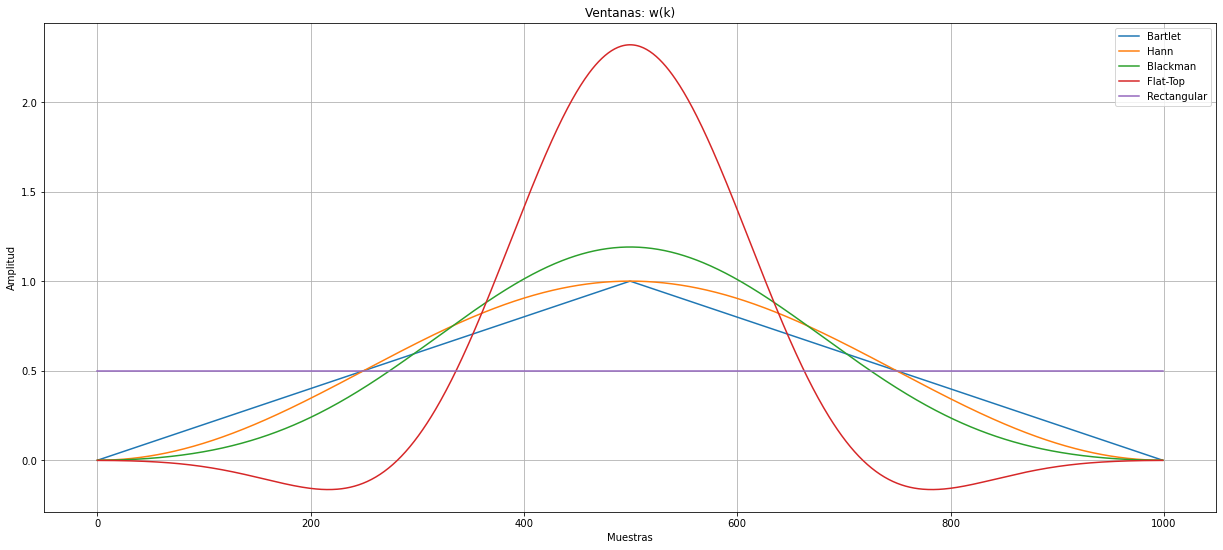

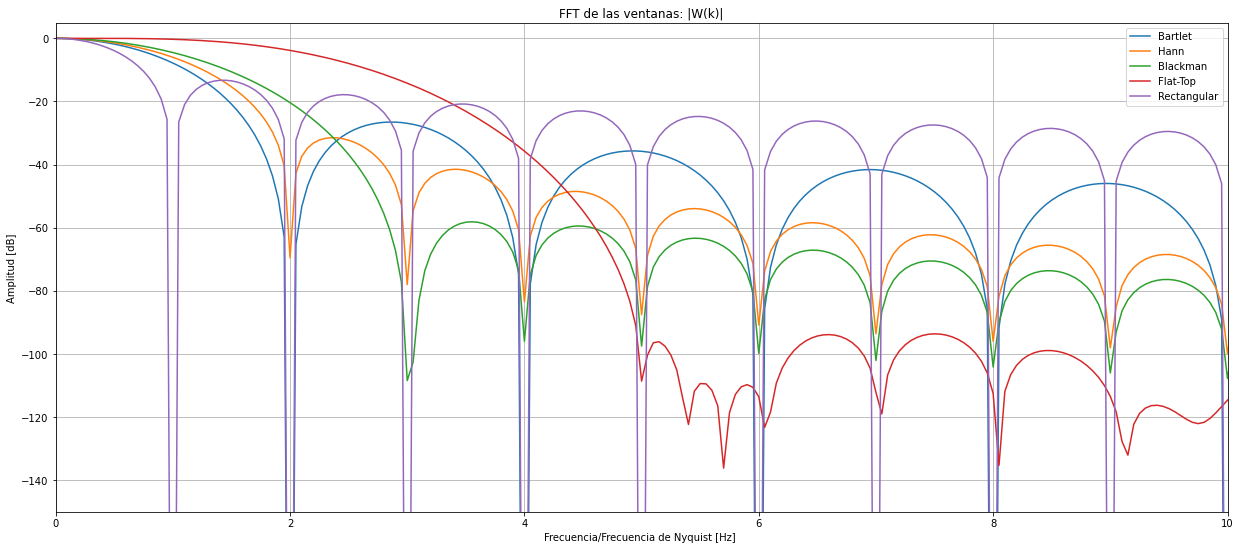

In [13]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################
plt.figure(1,(21,9))
plt.clf()
plt.plot(tt, winBartlett,   label = 'Bartlet'       )
plt.plot(tt, winHann,       label = 'Hann'          )
plt.plot(tt, winBlackman,   label = 'Blackman'      )
plt.plot(tt, winFlatTop,    label = 'Flat-Top'      )
plt.plot(tt, winRect,       label = 'Rectangular'   )
plt.title('Ventanas: w(k)' )
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.grid(which='both', axis='both')
plt.legend()

plt.figure(2,(21,9))
plt.clf()
plt.axis([0,10,-150,5]) #Se muestra de 0 a 10 en el eje X y de -150 a 0 dB en el eje Y
plt.plot(fftBartlett[2],    fftBartlett[0], label = 'Bartlet'       )
plt.plot(fftHann[2],        fftHann[0],     label = 'Hann'          )
plt.plot(fftBlackman[2],    fftBlackman[0], label = 'Blackman'      )
plt.plot(fftFlatTop[2],     fftFlatTop[0],  label = 'Flat-Top'      )
plt.plot(fftRect[2],        fftRect[0],     label = 'Rectangular'   )
plt.title('FFT de las ventanas: |W(k)|' )
plt.xlabel('Frecuencia [Hz] ')
plt.ylabel('Amplitud [dB]')
plt.grid(which='both', axis='both')
plt.legend()

b) Construya una tabla en la que figure la anchura normalizada del lóbulo principal  de la ventana, $\Omega_1$, siendo 

$$ \lvert W(\Omega_1) \rvert = \frac{\sqrt{2}}{2}$$ 

y el valor de transferencia máxima de los lóbulos secundarios expresado en dB 

$$ W_2 = \mathop{max} \{\lvert W(\Omega) \rvert\} ,\space\space \forall \space \Omega \geq \Omega_0 $$

siendo $\Omega_0$ la frecuencia del primer cruce por cero $\lvert W(\Omega) \rvert\ = 0$ ó la frecuencia límite superior del lóbulo principal. Utilice como norma de frecuencia la frecuencia de Nyquist, de manera que las mediciones de frecuencias sean adimensionales y comparables independientemente de la frecuencia de muestreo.

In [14]:

#######################################
# Tu simulación que genere resultados #
#######################################
#Bartlett
arrPosBartlett = np.where(fftBartlett[0] <= -3 )
posBartlett = fftBartlett[2][arrPosBartlett[0][0]]
maxBartlett = np.max(fftBartlett[0][40:80]) #40 y 80 son los ceros para bartlett
#Ver como buscar estos indices automagicamente

#Hann
arrPosHann =  np.where(fftHann[0] <= -3 )
posHann = fftHann[2][arrPosHann[0][0]]
maxHann = np.max(fftHann[0][40:60])

#Blackman
arrPosBlackman =  np.where(fftBlackman[0] <= -3 )
posBlackman = fftBlackman[2][arrPosBlackman[0][0]]
maxBlackman = np.max(fftBlackman[0][60:80])

#flat-top
arrPosFlatTop =  np.where(fftFlatTop[0] <= -3 )
posFlatTop = fftFlatTop[2][arrPosFlatTop[0][0]]
maxFlatTop = np.max(fftFlatTop[0][100:108])

#Rectangular
arrPosRect = np.where(fftRect[0] <= -3)
posRect = fftRect[2][arrPosRect[0][0]]
maxRect = np.max(fftRect[0][20:40])

tus_resultados = [ 
                   [posRect,     maxRect], # <-- acá debería haber numeritos :)
                   [posBartlett, maxBartlett], # <-- acá debería haber numeritos :)
                   [posHann,     maxHann], # <-- acá debería haber numeritos :)
                   [posBlackman, maxBlackman], # <-- acá debería haber numeritos :)
                   [posFlatTop,  maxFlatTop] # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$f_1$ (#)', '$W_2$ (dB)'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$f_1$ (#),$W_2$ (dB)
Rectangular,0.45,-13.277929
Bartlett,0.65,-26.526747
Hann,0.75,-31.477363
Blackman,0.85,-58.108845
Flat-top,1.90,-96.118461


<div class="alert alert-block alert-info">
<b>2)</b> Genere una señal bitonal de las siguientes características
</div>


  $  x(k) = x_1(k) + x_2(k) $

  $  x_1(k) = sen(\Omega_1·k)$

  $  x_2(k) = a_2 · sen(\Omega_2·k)   $

siendo 

  $\Omega_1 = \frac{\pi}{2}$

  $\Omega_2 = \Omega_1 + 10·\frac{2\pi}{N}$

  $a_2 = -40$ dB


Responda a las siguientes consignas:

<div class="alert alert-block alert-info">
<b>2.a)</b>  Calcule el espectro $ \lvert X(\Omega) \rvert $

</div>

In [20]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################


<div class="alert alert-block alert-info">
<b>2.b)</b> Repita a) disminuyendo la amplitud de $x_2$.
</div>

¿Cuál es el factor de escala mínimo de $x_2$, definido como $a^0_2$, que permite evidenciar su existencia en el espectro de $\lvert X(\Omega) \rvert$ ?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

¿De qué depende poder medir $x_2$?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

Considere ahora que esta señal proviene de un ADC de 16 bits. Incorpore al análisis el correspondiente ruido de cuantización. ¿Cómo afecta esta situación la medición de $x_2$?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

In [21]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################


<div class="alert alert-block alert-info">
<b>2.c)</b> Repita a) incrementando la frecuencia de $x_1$ para $\Omega_1 = \frac{\pi}{2} + d_1·\frac{2\pi}{N}$ para valores de $d_1 = (0,01; 0.25; 0.5)$. Aumente la amplitud de $a_2$ hasta que se evidencie sobre el leakage y construya una tabla con dicho valor para las 3 situaciones correspondientes a desintonías leve, moderada y máxima.
</div>

In [22]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################



#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   '', # <-- acá debería haber numeritos :)
                   '', # <-- acá debería haber numeritos :)
                   '' # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$a_2$ (dB)'],
               index=[  
                        'leve',
                        'moderada',
                        'máxima',
                     ])
HTML(df.to_html())

,$a_2$ (dB)
leve,
moderada,
máxima,


<div class="alert alert-block alert-info">
<b>2.d)</b> Evalúe el efecto de utilizar las ventanas implementadas en 1). Complete la tabla comparativa con respecto a la ventana rectangular, respecto a las mediciones $a^0_2$ realizada en 2.b); y $a^1_2$ en 2.c) para el caso de desintonía máxima.
</div>

Grafique $\lvert X_w(\Omega) \rvert = \lvert \mathcal{F}\{ x(k) · w(k) \} \rvert $ para las 4 ventanas de 1).

In [23]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################



In [24]:

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''] # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$a^0_2$ (dB)','$a^1_2$ (dB)'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$a^0_2$ (dB),$a^1_2$ (dB)
Rectangular,,
Bartlett,,
Hann,,
Blackman,,
Flat-top,,


<div class="alert alert-block alert-info">
<b>2.e)</b> Para las ventanas analizadas en 1), decida cuál sería la más apropiada en el caso que, <b>sin afectar otro parámetro</b>, $\Omega_2$ pudiera acercarse libremente a $\Omega_1 = \frac{\pi}{2} + 0.5·\frac{2\pi}{N}$. Complete la siguiente tabla con la distancia mínima, $\Omega_0, $ a la que se puede distinguir $x_2$ en $\lvert X_w(\Omega) \rvert$.
</div>

In [25]:

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   '', # <-- acá debería haber numeritos :)
                   '', # <-- acá debería haber numeritos :)
                   '', # <-- acá debería haber numeritos :)
                   '', # <-- acá debería haber numeritos :)
                   '' # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$\Omega_0$ (#)'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$\Omega_0$ (#)
Rectangular,
Bartlett,
Hann,
Blackman,
Flat-top,


<div class="alert alert-block alert-info">
<b>3)</b> Genere la siguiente señal 

</div>

  $  x(k) = a_0·\mathop{sen}(\Omega_1·k)$


siendo 

  $a_0 = 2$

  $\Omega_1 = \Omega_0 + f_r·\frac{2\pi}{N} $

  $\Omega_0 = \frac{\pi}{2} $
  
y la variable aleatoria definida por

  $f_r \sim \mathcal{U}(-2, \, 2) $

Considere 200 realizaciones para cada experimento requerido en los siguiente incisos.


<div class="alert alert-block alert-info">
<b>3.a)</b> Calcule experimentalmente el sesgo y la varianza del siguiente estimador:
</div>

 
  $ \hat{a_0} = \lvert X^i_w(\Omega_0) \rvert$
  
siendo

  $\lvert X^i_w(\Omega) \rvert = \lvert \mathcal{F}\{ x(k) · w_i(k) \} \rvert $ 
  
para la *i*-ésima ventana de las 5 utilizadas en el punto 2).

El sesgo y la varianza se definen para este caso como

  $ s_a = \mathop{E}\{ \hat{a_0}\} - a_0  $
    
  $ v_a = \mathop{var} \{ \hat{a_0} \} = \mathop{E}\{ ( \hat{a_0} - \mathop{E} \{ \hat{a_0} \} )^2 \} $
  
y pueden aproximarse cuando consideramos los valores esperados como las medias muestrales ($a=a_0$ para simplificar la notación)

  $ \mathop{E}\{ \hat{a_0}\}  = \hat{\mu_a} =  \frac{1}{M} \sum^{M-1}_{j=0} \hat{a_{j}} $
  
  $ s_a = \hat{\mu_a} - a  $
    
  $ v_a = \frac{1}{M} \sum^{M-1}_{j=0} (\hat{a_{j}} - \hat{\mu_a})^2 $



Grafique los histogramas para  $\lvert X^i_w(\Omega_0) \rvert$. 

<div class="alert alert-block alert-danger">
<img src="./ojo.svg" align="left" width="50" />   Cuide que todos los gráficos tengan <b>el mismo rango de valores en X</b> para facilitar la comparación.
</div>

In [26]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################



In [27]:

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$s_a$', '$v_a$'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$s_a$,$v_a$
Rectangular,,
Bartlett,,
Hann,,
Blackman,,
Flat-top,,


<div class="alert alert-block alert-info">
<b>3.b)</b> Repita a) para el siguiente estimador:
</div>

 
  $ \hat{a_1} = \sqrt{\frac{1}{5}·\sum_{j=a}^{b} \lvert X^i_w(j) \rvert ^2} $
  
siendo $ a = \Omega_0 - 2·\frac{2\pi}{N} $ y $ b = \Omega_0 + 2·\frac{2\pi}{N} $

para la *i*-ésima ventana de las 5 utilizadas en el punto 2).

Grafique los histogramas para  $\lvert X^i_w(\Omega_0) \rvert$. 

<div class="alert alert-block alert-danger">
<img src="./ojo.svg" align="left" width="50" />   Cuide que todos los gráficos tengan <b>el mismo rango de valores en X</b> para facilitar la comparación.
</div>

In [28]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################



In [29]:

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$s_a$', '$v_a$'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$s_a$,$v_a$
Rectangular,,
Bartlett,,
Hann,,
Blackman,,
Flat-top,,
